In [12]:
import pandas as pd
import matplotlib.pyplot as plt

Multiple Player Visualization

In [13]:
sample_input_csv = "/root/data/nfl-big-data-bowl-2026-prediction/train/input_2023_w01.csv"
sample_output_csv = "/root/data/nfl-big-data-bowl-2026-prediction/train/output_2023_w01.csv"

In [14]:
sample_input_df = pd.read_csv(sample_input_csv)
sample_input_df.head()

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22


In [15]:
sample_output_df = pd.read_csv(sample_output_csv)
sample_output_df.head()

,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56


Pick the first line of the input csv and use this play for the visualization.

In [16]:
if len(sample_input_df) != 0:
    sample_row = sample_input_df.iloc[0]
    game_id = sample_row['game_id']
    play_id = sample_row['play_id']
    print(f"The chosen play has the id {play_id} from the game with the id {game_id}")
else:
    raise ValueError("Input df is empty.")

The chosen play has the id 101 from the game with the id 2023090700


Filter output and input dataframes.

In [17]:
filtered_input_df = sample_input_df[(sample_input_df['game_id'] == game_id) & (sample_input_df['play_id'] == play_id)].copy()
filtered_output_df = sample_output_df[(sample_output_df['game_id'] == game_id) & (sample_output_df['play_id'] == play_id)].copy()

/tmp/ipykernel_60444/1764551777.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(players))


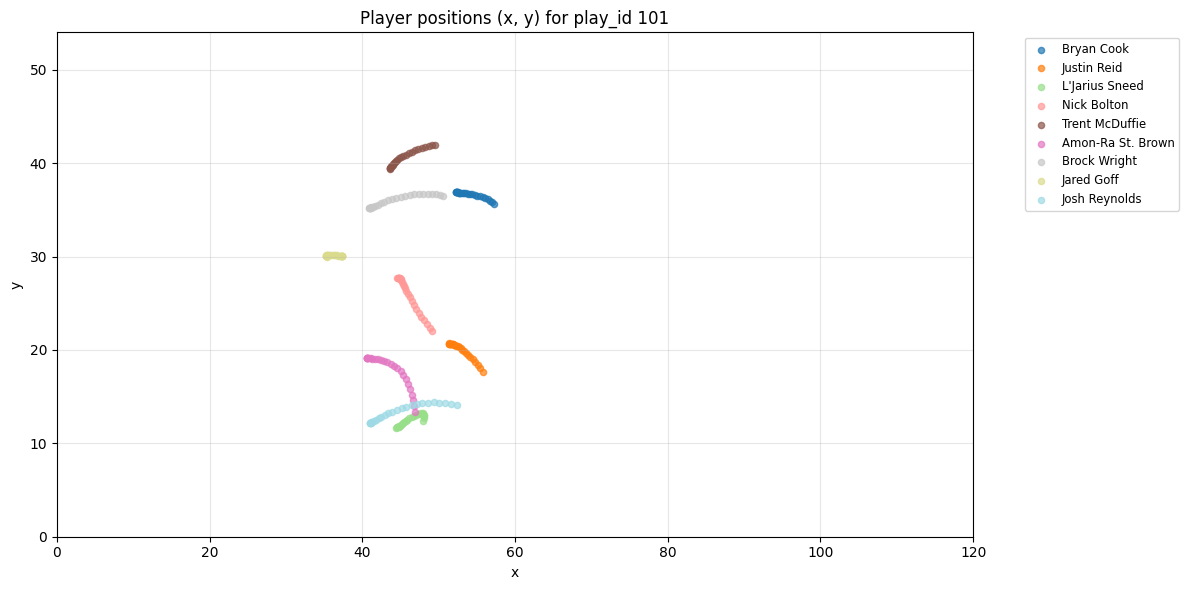

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
players = filtered_input_df['player_name'].unique()
colors = plt.cm.get_cmap('tab20', len(players))

for idx, player in enumerate(players):
    player_df = filtered_input_df[filtered_input_df['player_name'] == player]
    plt.scatter(player_df['x'], player_df['y'], label=player, color=colors(idx), s=20, alpha=0.7)

plt.xlim(0, 120)
plt.ylim(0, 54)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Player positions (x, y) for play_id {}'.format(filtered_input_df['play_id'].iloc[0]))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()